<a href="https://colab.research.google.com/github/mark3000-010701/DA-Banking/blob/main/DA_Banking1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import normalize
from scipy.stats import boxcox, probplot, norm, shapiro
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from time import time

In [ ]:
#ANN Model
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
from typing import Sequence
from pandas.core.frame import DataFrame
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/bank-additional-full.txt',sep=';')
df.to_csv(r'banking.csv',index=None)

In [ ]:
data = pd.read_csv('/content/banking.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
col=data.columns
col

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

# **Pre processing **

In [ ]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
data.shape

(41188, 21)

In [ ]:
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [ ]:
# data['education']=np.where(data['education'] =='basic.9y','Basic', data['education'])
# data['education']=np.where(data['education'] =='basic.6y','Basic', data['education'])
# data['education']=np.where(data['education'] =='basic.4y','Basic', data['education'])
# data['education'].unique()

In [ ]:
data['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

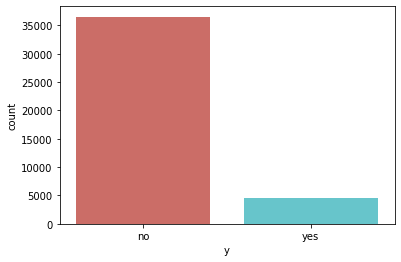

In [ ]:
sns.countplot(x='y', data=data, palette='hls')
plt.show()

In [ ]:
count_no_sub = len(data[data['y']=='no'])
count_sub = len(data[data['y']=='yes'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("% no sub: ", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("% sub : ", pct_of_sub*100)

% no sub:  88.73458288821988
% sub :  11.265417111780131


In [ ]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [ ]:
data.groupby('job').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
job,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086


In [ ]:
data.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
marital,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750


In [ ]:
data.groupby('education').mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
education,,,,,,,,,,
basic.4y,47.596504,264.827826,2.600575,965.704981,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880
basic.6y,40.448953,264.414485,2.556283,980.368237,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063
basic.9y,39.061208,261.291811,2.532341,979.133168,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509


Text(0, 0.5, 'tần suất sub account')

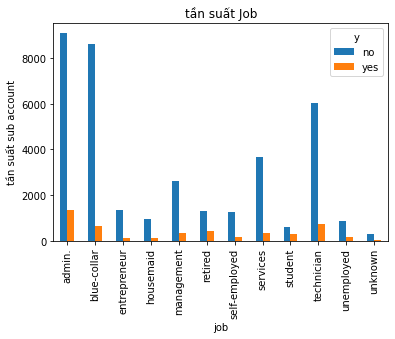

In [ ]:
pd.crosstab(data.job, data.y).plot(kind='bar')
plt.title('tần suất Job')
plt.xlabel("job")
plt.ylabel("tần suất sub account")

Text(0, 0.5, 'tần suất mở acc,mua')

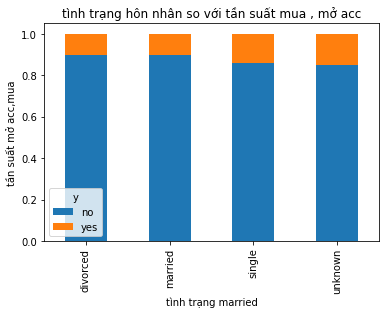

In [ ]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("tình trạng hôn nhân so với tần suất mua , mở acc")
plt.xlabel("tình trạng married")
plt.ylabel("tần suất mở acc,mua")

Text(0, 0.5, 'Subscribe')

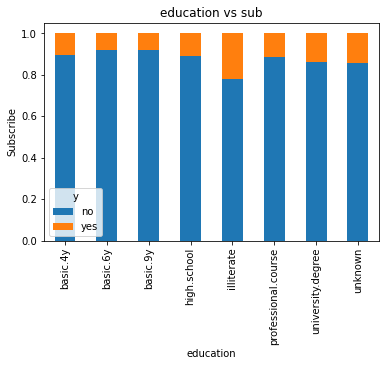

In [ ]:
table = pd.crosstab(data.education, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("education vs sub")
plt.xlabel("education")
plt.ylabel("Subscribe")

Text(0, 0.5, 'Subscribe')

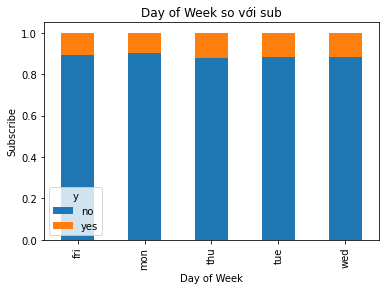

In [ ]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Day of Week so với sub")
plt.xlabel("Day of Week")
plt.ylabel("Subscribe")

Text(0, 0.5, 'Subscribe')

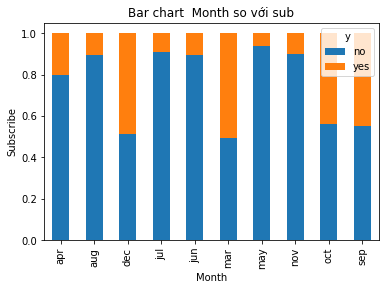

In [ ]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Bar chart  Month so với sub" )
plt.xlabel("Month")
plt.ylabel("Subscribe")

Text(0, 0.5, 'Subscribe')

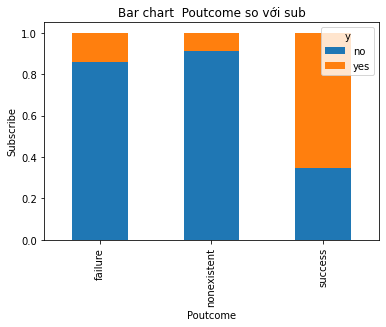

In [ ]:
table = pd.crosstab(data.poutcome, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Bar chart  Poutcome so với sub")
plt.xlabel("Poutcome")
plt.ylabel("Subscribe")

Text(0.5, 1.0, 'Histogram atribut Age')

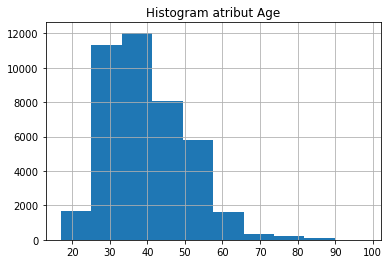

In [ ]:
data.age.hist()
plt.title('Histogram atribut Age')

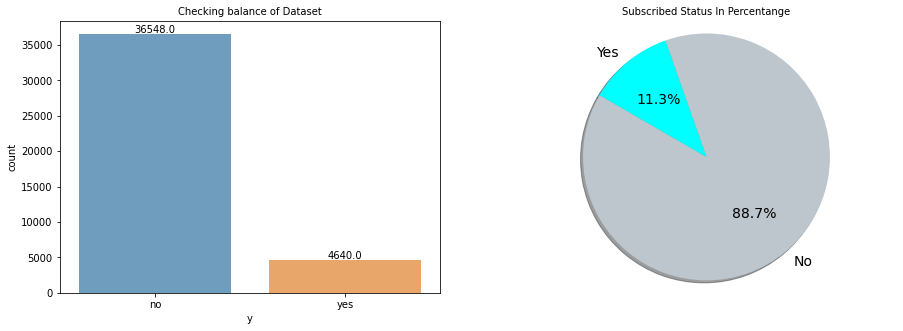

In [ ]:
#The number of Subscribes users - Binary Yes/No, Checking balanced Dataset
plt.rcParams['figure.figsize']=15,5
plt.subplot(121)
plt.title('Checking balance of Dataset', fontsize=10)
s = sns.countplot(x="y", data=data, alpha=0.7)
for p in s.patches:
    s.annotate(format(p.get_height(), '.1f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 4), 
                textcoords = 'offset points')


ax = plt.subplot(122)
mush_classpie = data['y'].value_counts()
mush_size = mush_classpie.values.tolist()
mush_types = mush_classpie.axes[0].tolist()
mush_labels = 'No', 'Yes'
colors = ['#BCC6CC', '#00FFFF']
plt.title('Subscribed Status In Percentange', fontsize=10)
patches, texts, autotexts = plt.pie(mush_size, labels=mush_labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=150)
for text,autotext in zip(texts,autotexts):
    text.set_fontsize(14)
    autotext.set_fontsize(14)

plt.axis('equal')  
plt.show()

Text(0.5, 0, '---Job---')

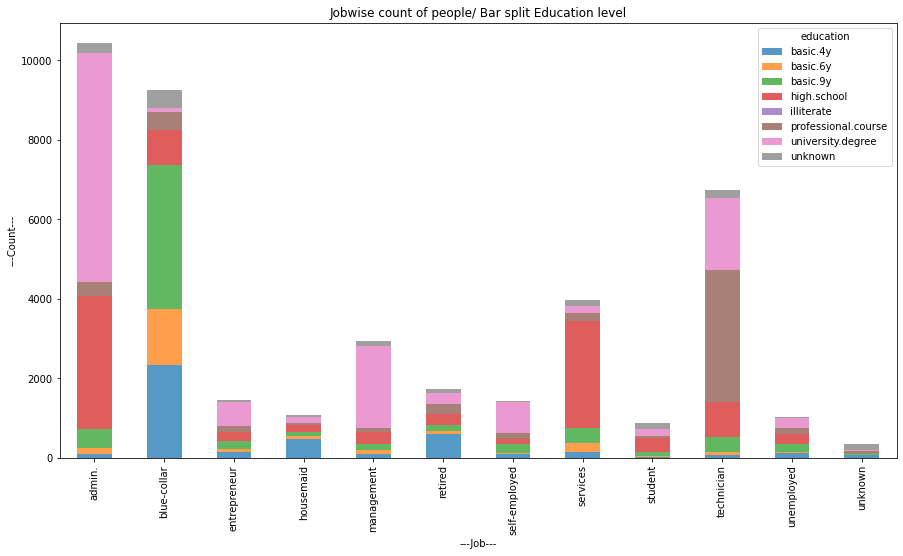

In [ ]:
#barplot of job with bars split by education
#pivot table to get jobs as index and education as column. count of 'age' are the values
df_pivot = pd.pivot_table(df,columns='education', index='job', aggfunc='count',values='age')
df_pivot.plot(kind='bar',stacked=True, figsize=(15,8), alpha=0.75)
plt.title('Jobwise count of people/ Bar split Education level')
plt.ylabel('---Count---')
plt.xlabel('---Job---')

In [ ]:
data

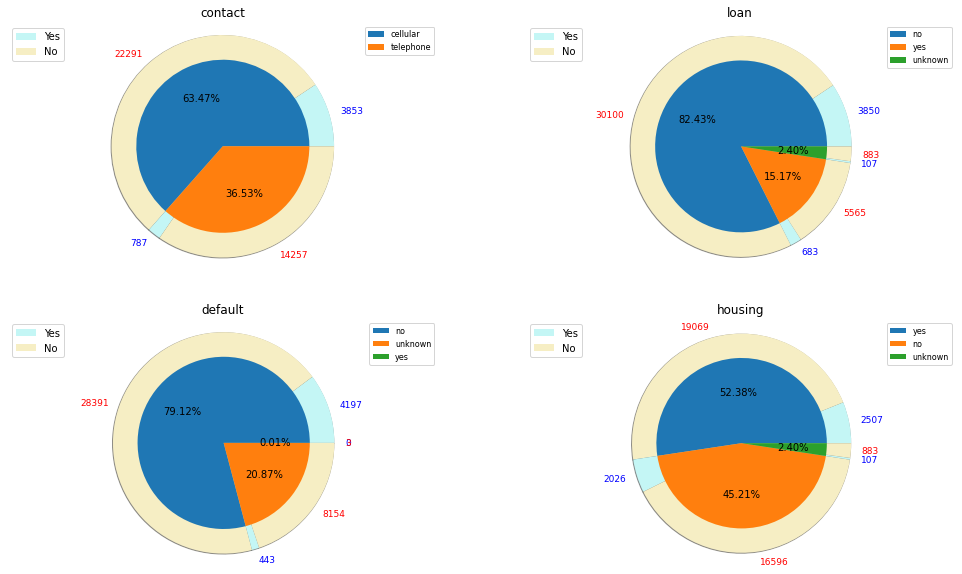

In [ ]:
f, axes = plt.subplots(4,1, figsize=(17,10), sharey = True) 
num_col = ['contact', 'loan', 'default', 'housing']

for j,col in enumerate(num_col):
    cols = data[col].value_counts()
    pop_size = cols.values.tolist()
    pop_types = cols.axes[0].tolist()
    poisonous_pop = [] 
    edible_pop = []   
    for pop in pop_types: 
        size = len(data[data[col] == pop].index)
        edibles = len(data[(data[col] == pop) & (data['y'] == 'yes')].index)
        edible_pop.append(edibles)
        poisonous_pop.append(size-edibles)
    combine_ed_poi = []
    for i in range(0,len(edible_pop)):
        combine_ed_poi.append(edible_pop[i])
        combine_ed_poi.append(poisonous_pop[i])

    #Double pie chart.
    plt.subplot(2,2,j+1)
    plt.title(col)
    #Outer Pie Chart
    patches1, texts1 = plt.pie(combine_ed_poi,radius = 4.5,labels= combine_ed_poi,
                                    colors=['#C4F6F5','#F6EEC4'], shadow=True, labeldistance= 1.1)
    for i in range(0,len(texts1)):
        if(i%2==0):
            texts1[i].set_color('blue')
        else:
            texts1[i].set_color('red')
    for aut in texts1:
        aut.set_fontsize(9)
    #Inner Pie Chart
    patches2, texts2, autotexts2 = plt.pie(pop_size, radius = 3.5,
            autopct='%1.2f%%', shadow=True, labeldistance= 4.2)
    for aut in autotexts2:
        aut.set_fontsize(10)
        aut.set_horizontalalignment('center')
    #Set 2 Legends to the plot.
    first_legend   = plt.legend(patches1, ['Yes','No'], loc="upper left", fontsize=10)
    second_ledgend = plt.legend(patches2, pop_types, loc="best",fontsize=8)
    plt.gca().add_artist(first_legend)
    plt.axis('equal')
plt.show()

In [ ]:
def absolute_value(val,month):
    a = round(val*sum(df[df['month']==month].y.value_counts())/100,0)
    return a

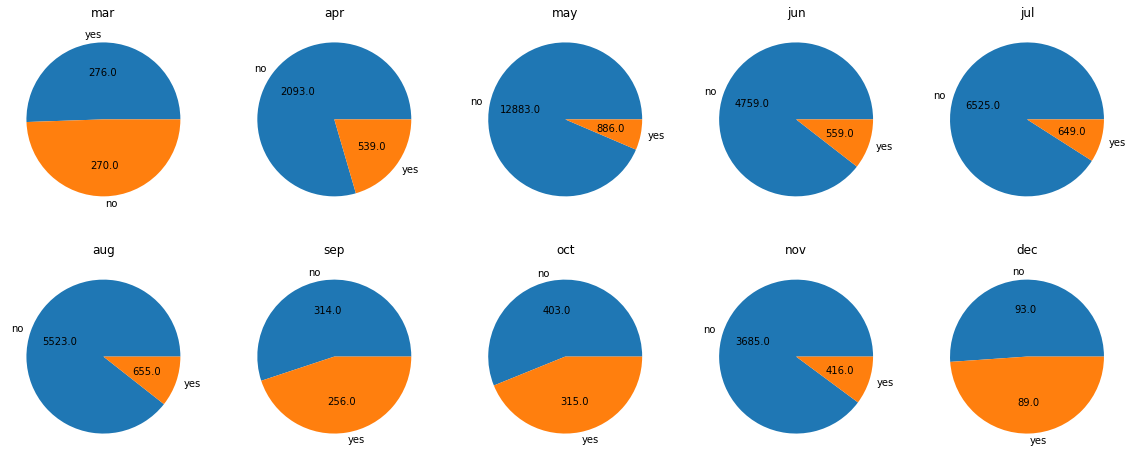

In [ ]:
fig, axs = plt.subplots(2,5,figsize=(20,8))
plot_dict=dict(zip(range(0,10),[axs[0,0],axs[0,1],axs[0,2],axs[0,3],axs[0,4],
                     axs[1,0],axs[1,1], axs[1,2], axs[1,3], axs[1,4]]))

#enumerate returns tuple of month and a number(idx)
for idx, month in enumerate(['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']):
    #gets axes from dict and plots on it
    plot_dict.get(idx).pie(data[data['month']==month].y.value_counts(),
             labels=data[data['month']==month].y.value_counts().index, autopct=lambda val: absolute_value(val,month))
    plot_dict.get(idx).set_title(month)

# Label Encoding

In [ ]:
data.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  y            41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


In [ ]:
dict_job = {
    "job":{
        "housemaid":1,
        "unemployed":0,
        "entrepreneur":4,
        "blue-collar":1,
        "services":3,
        "admin.":2,
        "technician":2,
        "retired":1,
        "management":4,
        "self-employed":3,
        "unknown":1,
        "student":0.5
    }}
dict_education = {
    "education":{
        "basic.4y":1,
        "basic.6y":1,
        "basic.9y":1,
        "high.school":1,
        "professional.course":2,
        "university.degree":2,
        "illiterate":0.9,
        "unknown":0.9
    }}

dict_poutcome = {
    "poutcome":{
        "nonexistent":0,
        "failure":0,
        "success":1
    }}
dict_y = {
    "y":{
        "no":0,
        "yes":1
    }}

In [ ]:
for i in [dict_poutcome,dict_y, dict_education, dict_job]:
    data.replace(i,inplace=True)

In [ ]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1.0,married,1.0,no,no,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,3.0,married,1.0,unknown,no,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3.0,married,1.0,no,yes,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2.0,married,1.0,no,no,no,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3.0,married,1.0,no,no,yes,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
#Encoding rest of the un ordinal categorical variable 
lc_X1 = LabelEncoder()
lst = ['marital','default','housing','loan']

for i in lst:
    data[i] = lc_X1.fit_transform(data[i])

In [ ]:
data_1 = pd.get_dummies(data,
                      columns=['marital','default','housing','loan'],
                      drop_first=True)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1.0,1,1.0,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,3.0,1,1.0,1,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,3.0,1,1.0,0,2,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2.0,1,1.0,0,0,0,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,3.0,1,1.0,0,0,2,telephone,may,mon,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


# Checking the correlation

In [ ]:
corr = data_1.corr()
print(corr['y'].sort_values(axis=0, ascending=True))

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
cons.price.idx   -0.136211
default_1        -0.099293
campaign         -0.066357
marital_1        -0.043398
job              -0.027963
loan_2           -0.004466
default_2        -0.003041
loan_1           -0.002270
housing_1        -0.002270
marital_3         0.005211
housing_2         0.011743
age               0.030399
education         0.045916
marital_2         0.054133
cons.conf.idx     0.054878
previous          0.230181
poutcome          0.316269
duration          0.405274
y                 1.000000
Name: y, dtype: float64


In [ ]:
# Let's Remove features that has less correlation
data_1.drop(columns=[
    'nr.employed','pdays','euribor3m','emp.var.rate',
    'cons.price.idx','contact','month','campaign', 'day_of_week'
    ], axis=0, inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


Text(0.5, 1.0, 'Correlation')

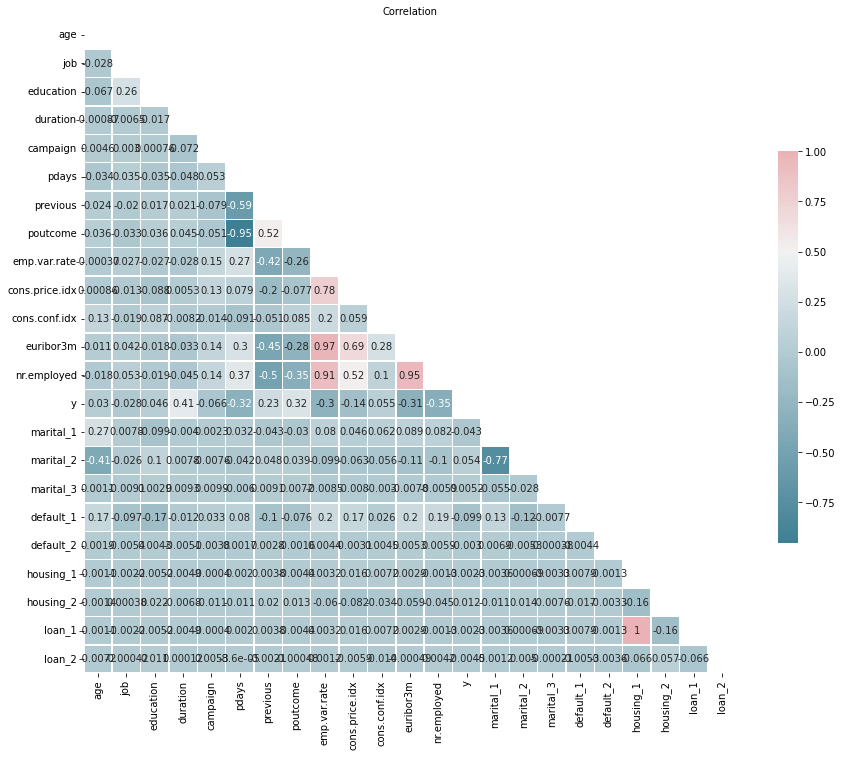

In [ ]:
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(15,12))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Drawing heatmap
sns.heatmap(corr, 
            mask=mask,
            cmap=cmap, 
            vmax=1, 
            center=0.5, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .6},
            annot=True
           )
plt.title("Correlation", fontsize =10)

# định biến (assign variable)

In [ ]:
X = data_1.drop(columns = 'y',axis=1).values
y = data_1['y'].values 

# Splitting the data and Scaling

In [ ]:
#split training - test set
X_train,X_test,y_train,y_test = train_test_split(X,
y,test_size=0.2,random_state=101)

In [ ]:
data_1['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [ ]:
def print_scores(model, labels, pred):
    # Confusion matrix
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)    
    recall = round(recall_score(labels, pred), 3)
    f1 = round(f1_score(labels, pred), 3)
    
    cm = confusion_matrix(labels, pred)
    data = pd.DataFrame(cm)
    
    labels = [f"TP: {data[0][0]} ",f"TN: {data[1][1]} ",f"FP: {data[1][0]} ",f"FN: {data[0][1]} "]
    labels = np.asarray(labels).reshape(2,2)
    
    f, ax = plt.subplots(figsize=(6,5))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues', ax=ax)    
    print(f"{model}:: Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, f1_score: {f1}")

In [ ]:
# print the cross-validation results
def print_cv_result(results):
    print(f"Best Params : {results.best_params_}\n")
    
    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print(f'{round(mean, 3)} (+/-{round(std * 2, 3)}) for {params}')

# Logistic Regression

LogisticRegression:: Accuracy: 0.901, Precision: 0.664, Recall: 0.309, f1_score: 0.421


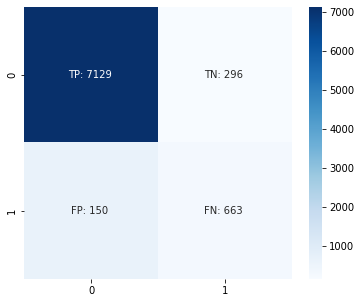

In [ ]:
lgr = LogisticRegression()
lgr.fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)
print_scores("LogisticRegression", y_test, y_pred_lgr)

# **ANN**

In [ ]:
classifier = Sequential()
print(data_1.shape)

(41188, 17)


In [ ]:
classifier.add(Dense(units=13,
                     activation='relu',
                     kernel_initializer='uniform',
                     input_dim=16))
classifier.add(Dropout(rate=0.1))

In [ ]:
classifier.add(Dense(units=13,
                     activation='relu',
                     kernel_initializer='uniform'))
classifier.add(Dropout(rate=0.1))

In [ ]:
classifier.add(Dense(units=1,
                     activation='sigmoid',
                     kernel_initializer='uniform'))

In [ ]:
#compile ANN
classifier.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'])

In [ ]:
#fitting ANN
start = time()
classifier.fit(x=X_train, y=y_train, batch_size=10,epochs=100)

Epoch 1/100
3295/3295 [==============================] - 5s 1ms/step - loss: 0.2576 - accuracy: 0.8988
Epoch 2/100
3295/3295 [==============================] - 4s 1ms/step - loss: 0.2395 - accuracy: 0.9001
Epoch 3/100
3295/3295 [==============================] - 4s 1ms/step - loss: 0.2366 - accuracy: 0.8996
Epoch 4/100
3295/3295 [==============================] - 4s 1ms/step - loss: 0.2333 - accuracy: 0.9005
Epoch 5/100
3295/3295 [==============================] - 4s 1ms/step - loss: 0.2308 - accuracy: 0.9033
Epoch 6/100
3295/3295 [==============================] - 4s 1ms/step - loss: 0.2280 - accuracy: 0.9044
Epoch 7/100
3295/3295 [==============================] - 4s 1ms/step - loss: 0.2266 - accuracy: 0.9042
Epoch 8/100
3295/3295 [==============================] - 4s 1ms/step - loss: 0.2246 - accuracy: 0.9043
Epoch 9/100
3295/3295 [==============================] - 4s 1ms/step - loss: 0.2243 - accuracy: 0.9055
Epoch 10/100
3295/3295 [==============================] - 4s 1ms/step - l

ANN Time:514691.32
ANN:: Accuracy: 0.903, Precision: 0.644, Recall: 0.379, f1_score: 0.477


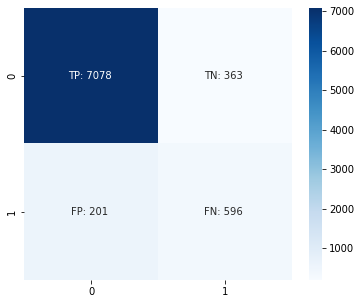

In [ ]:
y_pred_ann = classifier.predict(X_test)
end = time()
print(f"ANN Time:{round((end - start), 5) * 1000}")
"""
y_pred array contains boolean value of whether dependent variable has more than 50% chance of being ‘yes’ or not.

If ‘yes’ it will be True, if ‘no’ it will be ‘False’.
"""
y_pred_ann_bool = y_pred_ann > 0.5

print_scores("ANN", y_test, y_pred_ann_bool)

# **SVM**

SVM Time:25123.11
SVM:: Accuracy: 0.901, Precision: 0.671, Recall: 0.293, f1_score: 0.408


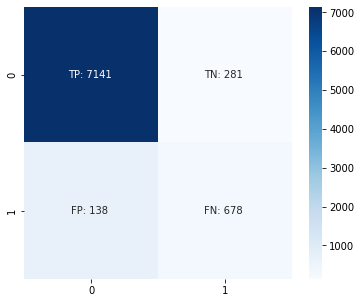

In [ ]:
start = time()
svc = SVC(kernel = "rbf", C=10)
svc.fit(X_train,y_train)
y_pred_svm = svc.predict(X_test)
end = time()
print(f"SVM Time:{round((end - start), 5) * 1000}")
print_scores("SVM", y_test, y_pred_svm)

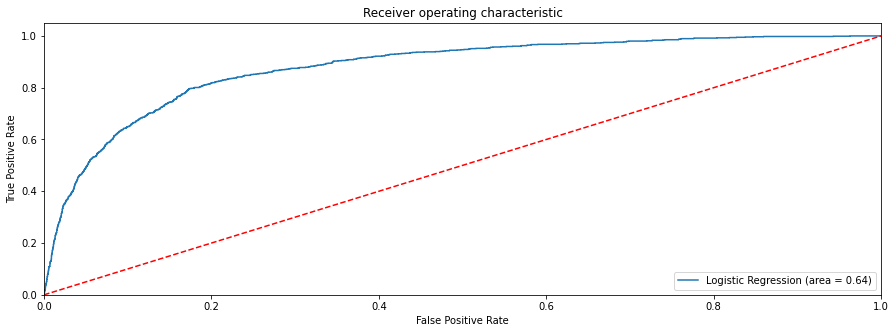

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, lgr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lgr.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()